In [51]:
import collections
import math

Project=input("Zebrafish or Dmel? typing")


if Project=="Zebrafish":
    Zebra_chromosome_dict={}
    with open("/home/junwoojo/Zebrafish/Zebrafish_genome/Zebragenome_without_contig.fa") as file:
        for line in file:
            if ">" in line:
                Zebra_chromosome_dict[line.split()[0].lstrip(">")]=" ".join(line.split()[8:10])



dict_name={}
with open("/home/junwoojo/Zebrafish/names.dmp") as file:
    for line in file:
        if "scientific name" in line:
            taxid=line.split("\t")[0]
            dict_name[taxid.strip()]=line.split("|")[1].strip()


def determine_integ(read_name,input_dict):
    local_dict_a={}
    local_dict_b={}
    globals()[read_name]['bac_range']=[]
    globals()[read_name]['fly_range']=[]
    line_len=input_dict['qlength']
    fly=input_dict['fly']
    bacteria=input_dict['bacteria']
    for i in range(line_len):
        if 'bacteria' in input_dict.keys():
            for kkk in input_dict['bacteria']:
                bac_max=kkk[1]
                bac_min=kkk[0]
                bac_taxo=kkk[2]
                if bac_min<=i<=bac_max:
                    globals()[read_name]['bac_range']+=[i]
                    globals()[read_name.strip()][bac_taxo]+=[i]
                    
                    
        if 'fly' in input_dict.keys():
            for ttt in input_dict['fly']:
                fly_max=ttt[1]
                fly_min=ttt[0]
                fly_region=ttt[2]
                if fly_min<=i<=fly_max:
                    globals()[read_name]['fly_range']+=[i]
                    globals()[read_name.strip()][fly_region]+=[i]

    if Project=="Dmel":
        for QQQ in ['2L','2R','3L','3R','X','Y','rDNA']:
            globals()[read_name][QQQ]=len(set(globals()[read_name][QQQ]))
            local_dict_a[QQQ]=globals()[read_name][QQQ]
    elif Project=="Zebrafish":
        for QQQ in Zebra_chromosome_dict.keys():
            globals()[read_name][QQQ]=len(set(globals()[read_name][QQQ]))
            local_dict_a[QQQ]=globals()[read_name][QQQ]
        
    list_of_the_bacteria=list(set([i for i in globals()[read_name].keys() if 'taxid' in i]))
    for ppp in list_of_the_bacteria:
        globals()[read_name][ppp]=len(set(globals()[read_name][ppp]))
        local_dict_b[ppp]=globals()[read_name][ppp]
        
        


    
    
    local_dict_a=sorted(local_dict_a.items(), key=lambda x: x[1],reverse=True)
    
    local_dict_a=[i for i in local_dict_a if i[1]>0]
    
    local_dict_b=sorted(local_dict_b.items(), key=lambda x: x[1],reverse=True)
    
    local_dict_b=[i for i in local_dict_b if i[1]>0]
    if len(local_dict_b)>0:
        globals()[read_name]['bacteria_name']=dict_name[local_dict_b[0][0].split("|")[1].strip()]
    if len(local_dict_a)>0:
        globals()[read_name]['fly_chromosome']=local_dict_a[0][0]
     
    globals()[read_name]['bac_range']=list(set(globals()[read_name]['bac_range']))     
    globals()[read_name]['fly_range']=list(set(globals()[read_name]['fly_range']))
    



            
#[1,2,3,4,7,8,9] -> [[1,2,3,4],[7,8,9]] -> [[1,4],[7,9]]
def seperate_list(input_list):
    list_k=[]
    list_final=[]
    list_last=[]
    ttt=0
    index=-1
    input_list=sorted(set(input_list))
    for i in input_list:
        index+=1
        if (input_list[index-1]+1 != i) and (index > 0):
            ttt+=1
        list_k.append([i,ttt])
    list_k2=[i[1] for i in list_k]
    list_k2=list(set(list_k2))
    for zzz in list_k2:
        list_final.append([i[0] for i in list_k if zzz==i[1]])
    for sss in list_final:
        Minimal=min(sss)
        Maximal=max(sss)
        list_last.append([Minimal,Maximal])
    return(list_last)
                

Zebrafish or Dmel? typingZebrafish


In [52]:
# Process of blast output
list_a=[]
list_b=[]
input_blast_out=input("chose 4 choices (NormalZebra) (MetroZebra) (GermfreeFly) (ControlFly)")

if input_blast_out=="NormalZebra":
    input_Blast_out_result="/home/junwoojo/Zebrafish/normal_zebra_intestine/blast_out_result"
elif input_blast_out=="MetroZebra":
    input_Blast_out_result="/home/junwoojo/Zebrafish/Metronidazole_zebra_intestine/blast_out_result"
elif input_blast_out=="GermfreeFly":
    input_Blast_out_result="/home/junwoojo/Zebrafish/Germ_free_dmel/blast_out_result"
elif input_blast_out=="ControlFly":
    input_Blast_out_result="/home/junwoojo/Zebrafish/Control_dmel/blast_out_result"
else:
    raise Exception("Type between  4 types")
    


with open(input_Blast_out_result) as file:
    for line in file:
        if line.startswith("#"):
            continue
        list_a.append(line.split('\t')[0])
        qseqid=line.split('\t')[0]
        globals()[qseqid]=collections.defaultdict(list)
with open(input_Blast_out_result) as file:
    for line in file:
#        if line.startswith("#") or line.split('\t')[1]=="rDNA":
        if line.startswith("#"):
#        if line.startswith("#") or line.split('\t')[1]=="rDNA" or "taxid" in line.split('\t')[1]:
            continue
        qseqid=line.split('\t')[0].strip()
        sseqid=line.split('\t')[1].strip()
        pident=line.split('\t')[2].strip()
        aliment_length=line.split('\t')[3].strip()
        mismatches=line.split('\t')[4].strip()
        gap_opens=line.split('\t')[5].strip()
        qstart=line.split('\t')[6].strip()
        qend=line.split('\t')[7].strip()
        sstart=line.split('\t')[8].strip()
        send=line.split('\t')[9].strip()
        evalue=line.split('\t')[10].strip()
        bitscore=line.split('\t')[11].strip()
        qlength=line.split('\t')[12].strip()
        if float(evalue) > math.exp(-20) :
            continue
        globals()[qseqid]['qlength']=int(qlength)
        if 'taxid' not in sseqid:
            globals()[qseqid]['fly']+=[[int(qstart),int(qend),sseqid]]
        if 'taxid' in sseqid:
            globals()[qseqid]['bacteria']+=[[int(qstart),int(qend),sseqid]]
        list_b.append(qseqid)
            
        
list_a=set(list_a)
list_b=set(list_b)
import os


chose 4 choices (NormalZebra) (MetroZebra) (GermfreeFly) (ControlFly)NormalZebra


In [ ]:
for dict_input in list_b:
    determine_integ(dict_input,globals()[dict_input])
    


In [30]:
from dna_features_viewer import GraphicFeature, GraphicRecord
for ttt in list_b:
    readid=ttt
    bac_min_max_list=seperate_list(globals()[readid]['bac_range'])
    fly_min_max_list=seperate_list(globals()[readid]['fly_range'])
    total_length=globals()[readid]['qlength']
    features=[]
    if len(seperate_list(globals()[readid]['fly_range']))==0 or seperate_list(globals()[readid]['bac_range'])==0:
        continue
    for i in bac_min_max_list:
        features.append(GraphicFeature(start=i[0], end=i[1], strand=0, color="#ffd700", label=globals()[ttt]['bacteria_name']))
    if Project=="Dmel":
        for i in fly_min_max_list:
            features.append(GraphicFeature(start=i[0], end=i[1], strand=0, color="#ffcccc", label=globals()[ttt]['fly_chromosome']))
    elif Project=="Zebrafish":
        for i in fly_min_max_list:
            features.append(GraphicFeature(start=i[0], end=i[1], strand=0, color="#ffcccc", label=Zebra_chromosome_dict[globals()[ttt]['fly_chromosome']]))
            #print(globals()[ttt]['fly_chromosome'])
    

    record = GraphicRecord(sequence_length=total_length, features=features)
    record.plot(figure_width=10)




TypeError: unhashable type: 'list'

In [46]:
globals()[list(list_b)[0]]
#Zebra_chromosome_dict['LR812572.1']

defaultdict(list,
            {'qlength': 4878,
             'bacteria': [[1845, 2943, 'kraken:taxid|1280|NZ_CP033086.1'],
              [1845, 2943, 'kraken:taxid|1280|NZ_CP033085.1'],
              [2395, 3164, 'kraken:taxid|2986923|NZ_JAOYTJ010000021.1'],
              [2398, 3164, 'kraken:taxid|2986930|NZ_JAOYTP010000042.1'],
              [2394, 3164, 'kraken:taxid|2986929|NZ_JAOYTO010000018.1'],
              [1845, 2215, 'kraken:taxid|2986929|NZ_JAOYTO010000018.1'],
              [1793, 2401, 'kraken:taxid|2989817|NZ_JAPCHW010000040.1'],
              [1802, 2381, 'kraken:taxid|2986923|NZ_JAOYTJ010000023.1'],
              [1802, 2337, 'kraken:taxid|2986930|NZ_JAOYTP010000025.1'],
              [1344, 1458, 'kraken:taxid|2986930|NZ_JAOYTP010000025.1'],
              [2511, 2900, 'kraken:taxid|2184519|NZ_CP029344.1'],
              [1845, 2218, 'kraken:taxid|2184519|NZ_CP029344.1'],
              [2369, 2900, 'kraken:taxid|470|NZ_CP050529.1'],
              [1845, 2208, 'kraken:t

In [ ]:
# list_chromosome=[]
# list_chromosome2=[]

# for i in list_b:
#     list_chromosome.append(globals()[i]['fly_chromosome'])
# list_chromosome=[i for i in list_chromosome if type(i) is not list]
# counter=collections.Counter(list_chromosome)
# for i,l in counter.items():
#     print(i,l,sep="\t")
    
    
# list_chromosome=[]
# for i in list_b:
#     list_chromosome.append(globals()[i]['bacteria_name'])
# list_chromosome=[i for i in list_chromosome if type(i) is not list]
# counter=collections.Counter(list_chromosome)
# with open("/home/junwoojo/integ_bacteria_barcode20.txt",'w') as file:
#     for i,l in counter.items():
#         file.writelines([str(i),"\t",str(l),"\n"])

In [14]:
print([i for i in list(globals()[list(list_b)[1]].keys()) if 'kraken' not in i])

['qlength', 'fly', 'bacteria', 'bac_range', 'fly_range', 'X', 'rDNA', 'Y', '4', '2R', '2L', '3L', '3R', 'bacteria_name', 'fly_chromosome']


In [6]:
# seperate_list([1,2,3,5,5,9])
# print(seperate_list(globals()[list(list_b)[0]]['fly_range']))
#os.listdir('../')
fastq_dict={}
with open('../../../../barcode19/minimap_analysis/supplementary_read_analysis/kimeric_read.fa') as file:
    n=0
    for line in file:
        n+=1
        if line.startswith(">"):
            read_id=line.split(' ')[0].lstrip('>').strip()
        if not line.startswith(">"):
            seq=line.strip()
        if n%2==0:
            fastq_dict[read_id]=seq
def bacteria_sequence_generater(input_list,seq):
    max=input_list[1]
    min=input_list[0]
    return seq[min-1:max-1].strip()
for i in list_b:
    seq_id=i
    seq=fastq_dict[i]
    bacteria_range_list=seperate_list(globals()[i]['bac_range'])
    for ttt in bacteria_range_list:
        if len(bacteria_range_list)==0:
            continue
        seq_base=bacteria_sequence_generater(ttt,seq)
        globals()[i]['seq_base']+=[seq_base]
    
    
    

5689457d-6dd9-5bda-b3ca-43a393cb5364
1f62e18a-5795-4e49-9c31-53729dbe50c3
98989d86-222e-532c-a19e-de8865d5c0ad
64a4f660-e71d-555a-a196-9449fffdfba8
d739fa67-71ae-44ba-b6a2-a33930b902ad
265c776f-54ea-4571-8c9d-5fd7781b14b7
4cb1fc94-531f-458c-b722-3e8d60ed3e85
5660a145-64c3-4c70-9ea5-4880a54025d1
782128c1-4fbd-4205-88c5-b4116961d763
34d7f382-58d1-5677-b3f6-33bae181b5d4
bf8f55d3-78d3-422b-9322-478fb1b513f8
0dfbfe9f-563d-45ef-b8ab-29f4d742fa5b
5e6bb4b0-8bc9-412e-b612-086335f89bb6
53bc3152-243b-454a-b5c8-b6fba2d43498
4ee5614e-f374-4f56-b70f-d6b185922eee
a31e3729-5742-41d1-b317-c189ff7b615d
d5d264fd-0020-437d-8ecb-6579803fdbee
1a3048f0-0dbe-427f-a771-5cfe001bf609
de186a01-900f-4915-8b3a-ba49ff986dee
c384ab85-d91d-4a42-86f7-242c49448c5a
32a03a65-0a19-5c7d-b153-af06cd65674e
f16b5939-a9db-5879-b3b6-f5668b122d52
e525da05-77e2-4adb-ac0f-74d93e3bc311
82a50978-9186-4360-8eef-dddd1b072598
4fb851e2-0b22-4d7f-8212-dce6a981995f
2158f314-6c06-5f7d-83da-f246d90c331d
6b5a9543-5452-574d-a362-f144e38a0002
b

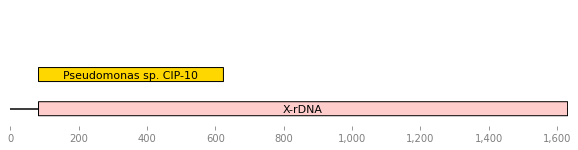

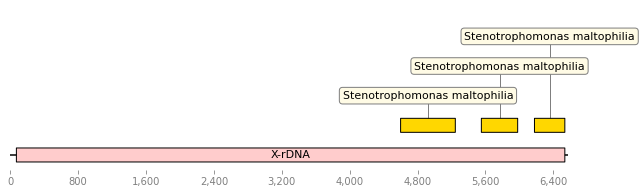

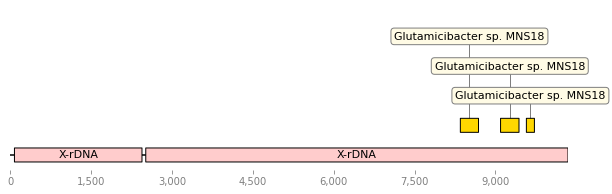

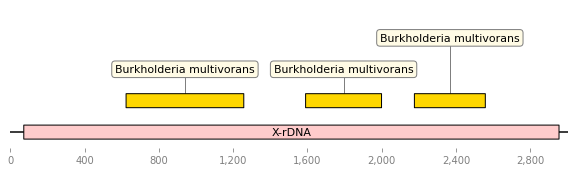

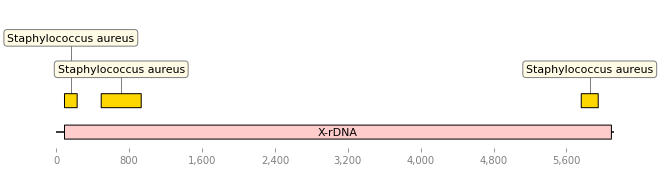

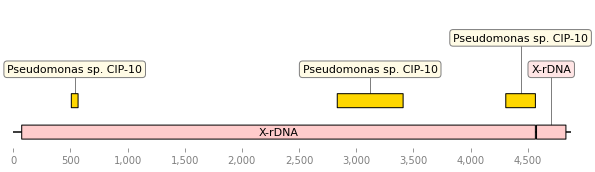

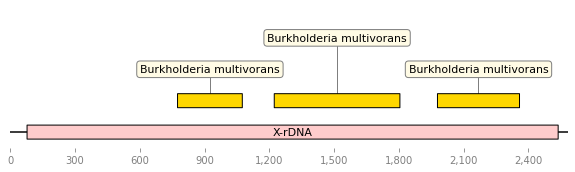

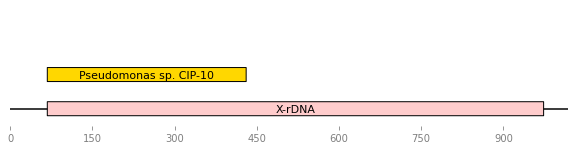

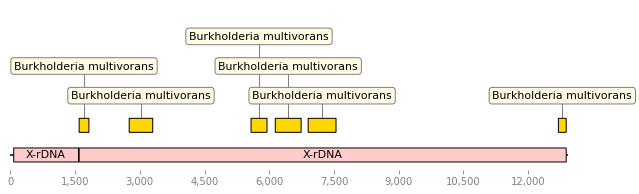

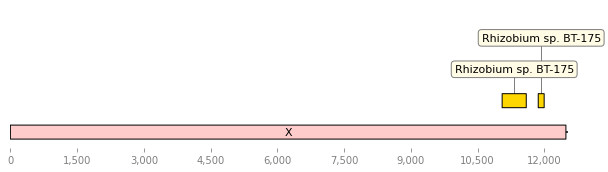

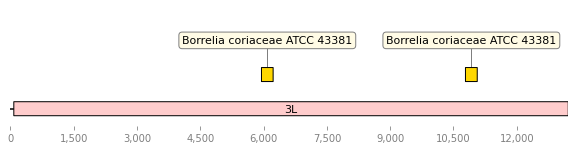

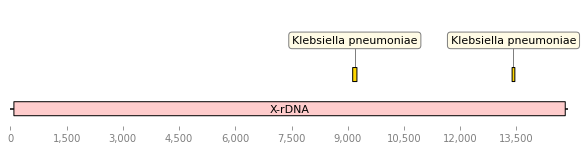

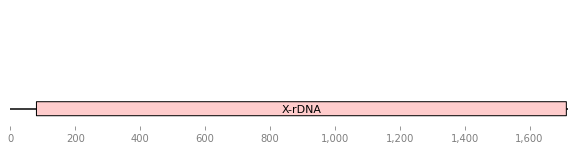

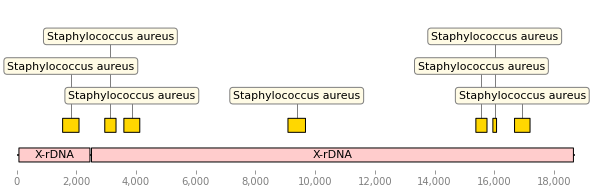

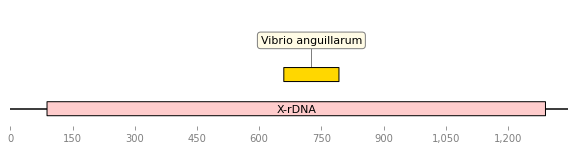

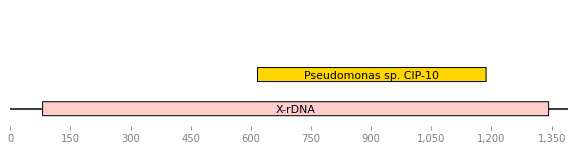

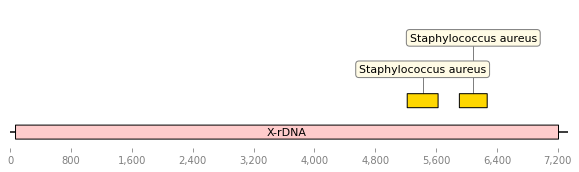

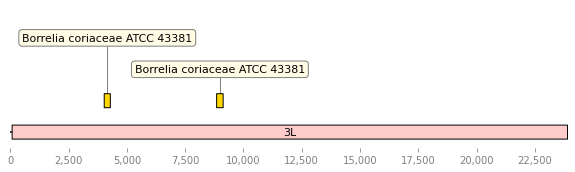

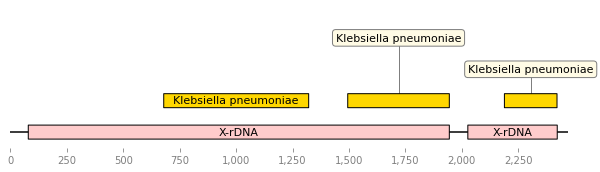

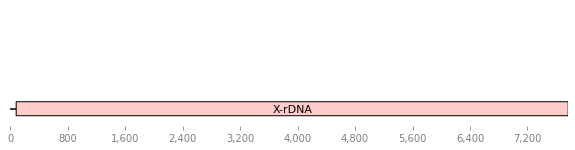

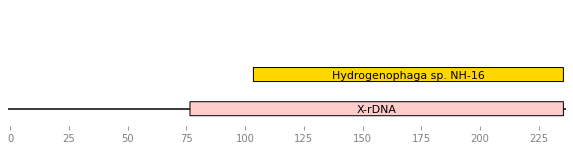

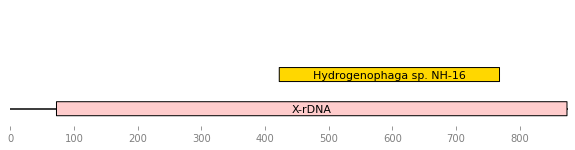

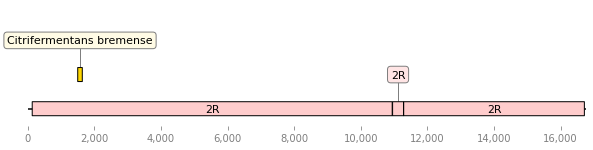

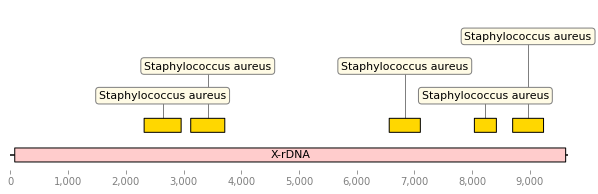

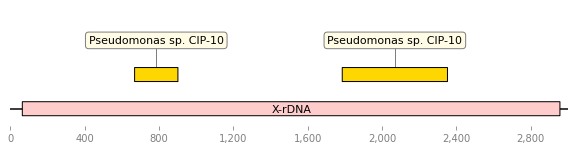

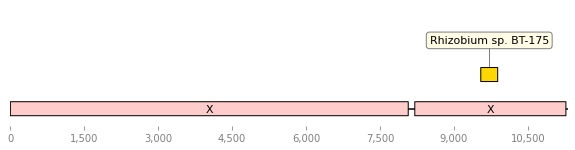

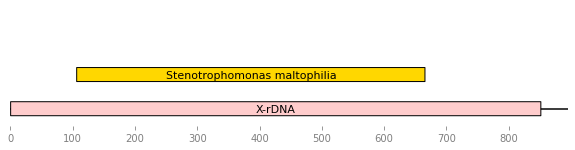

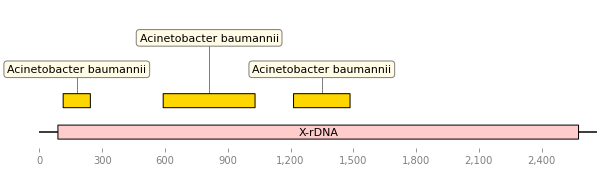

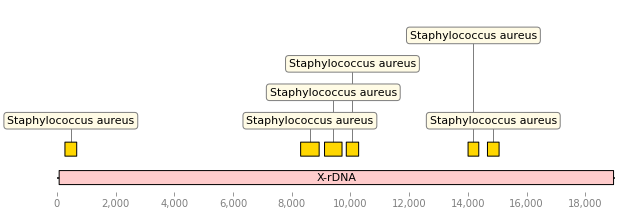

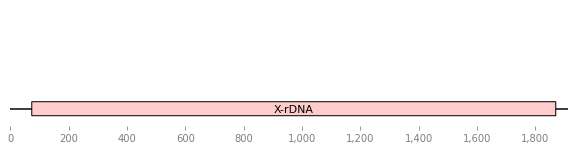

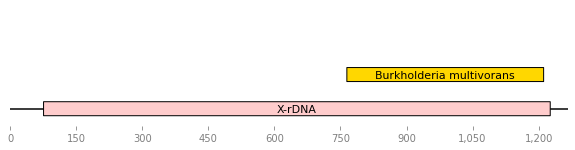

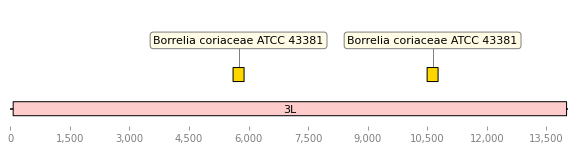

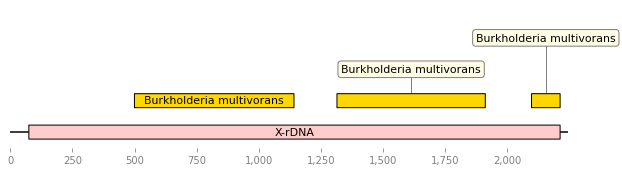

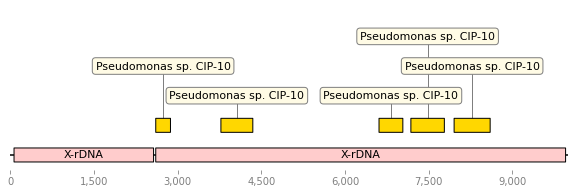

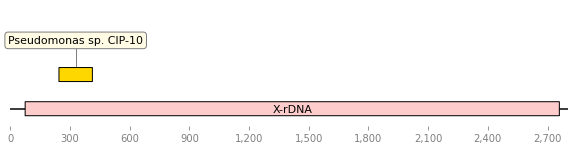

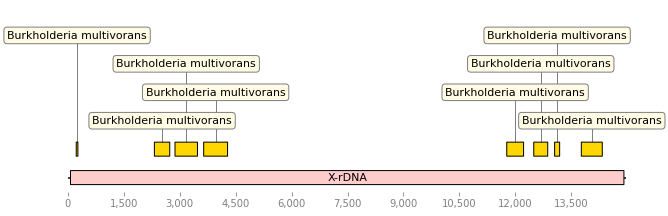

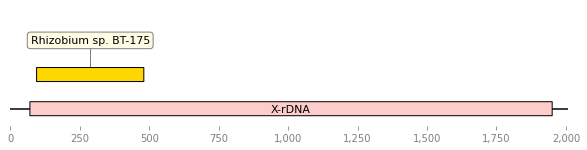

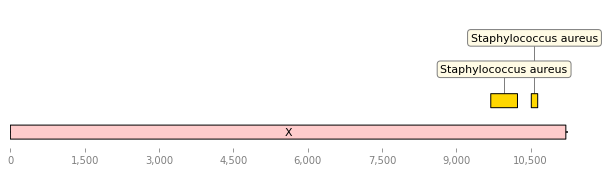

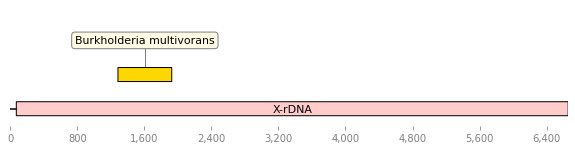

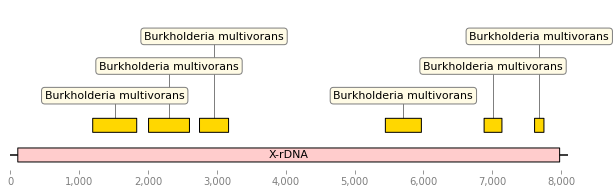

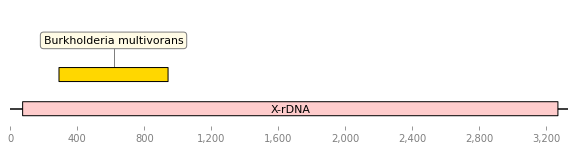

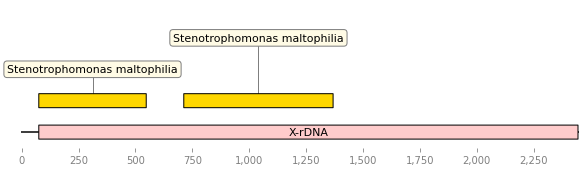

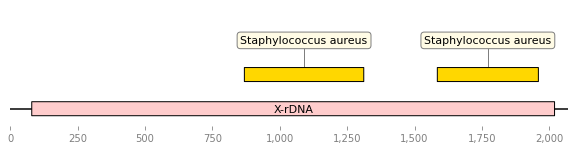

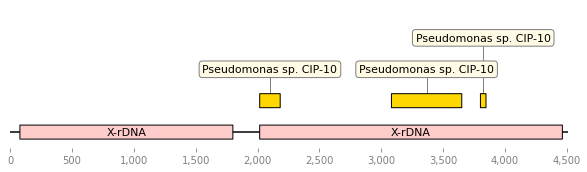

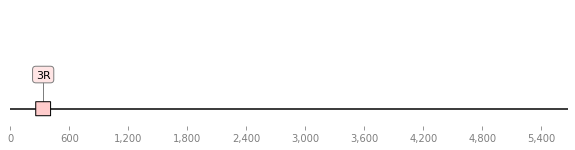

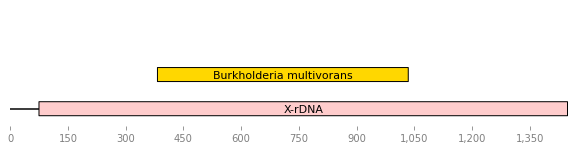

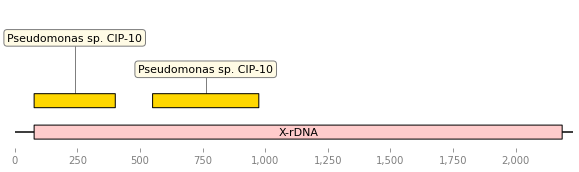

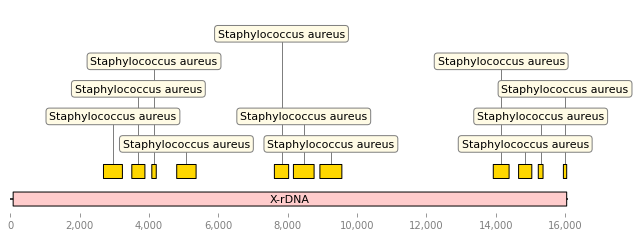

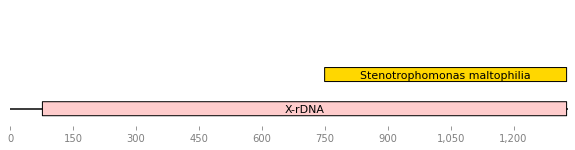

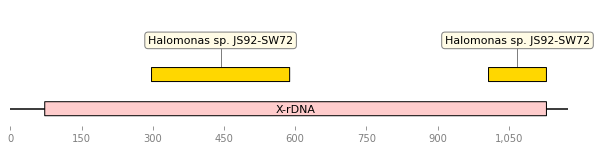

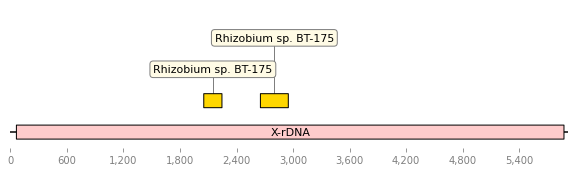

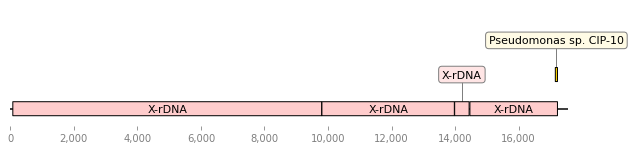

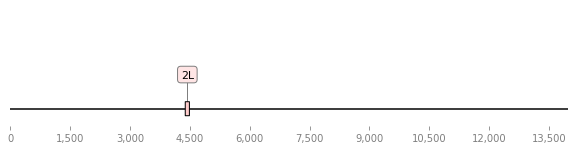

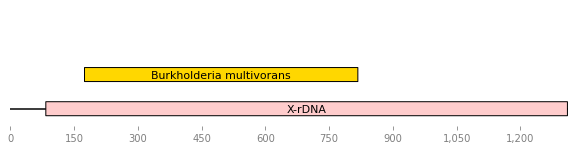

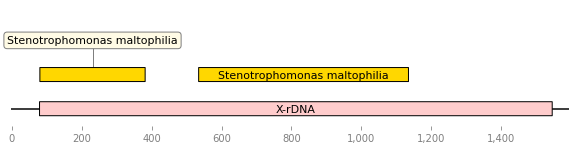

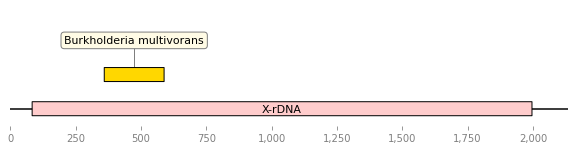

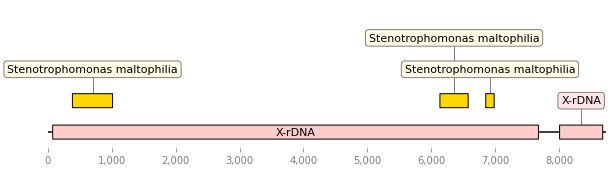

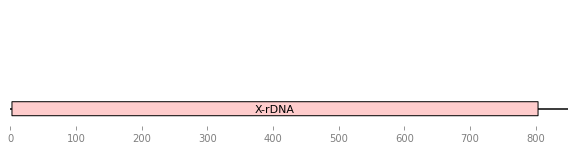

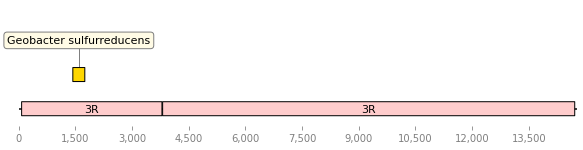

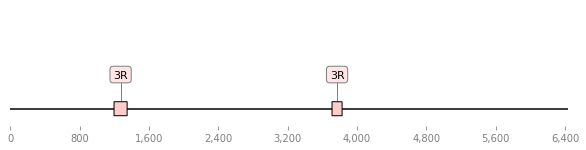

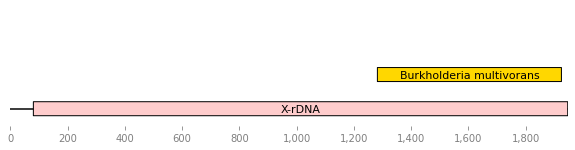

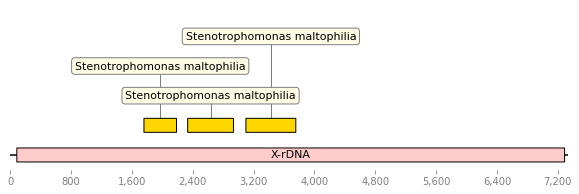

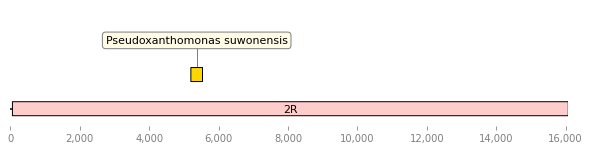

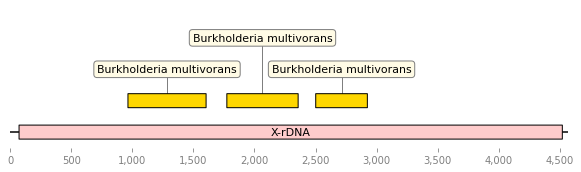

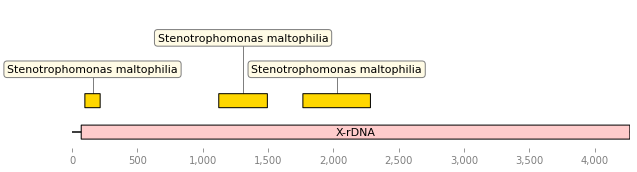

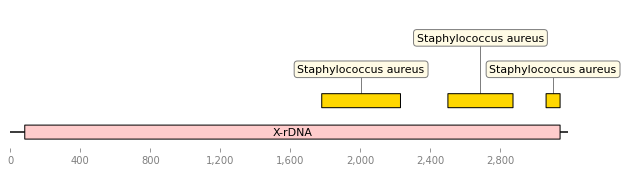

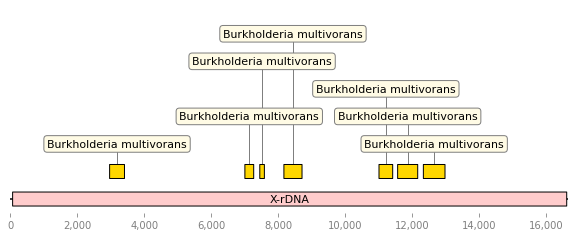

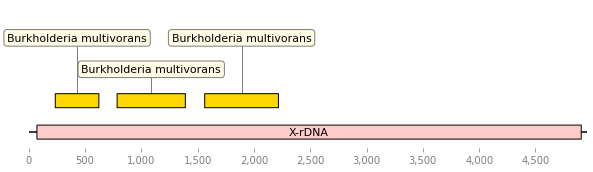

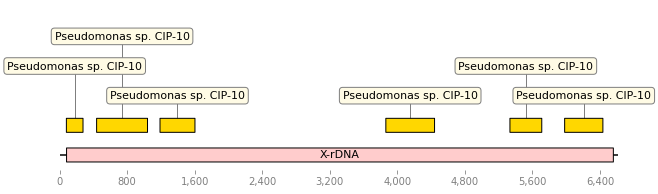

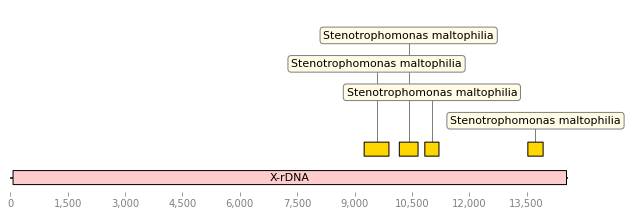

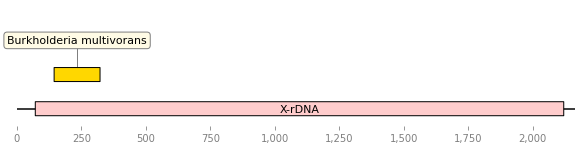

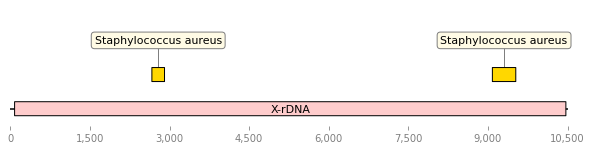

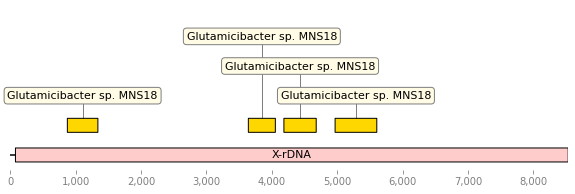

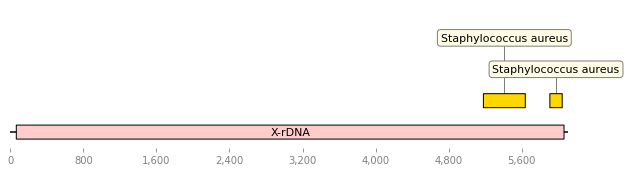

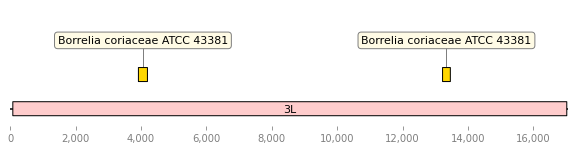

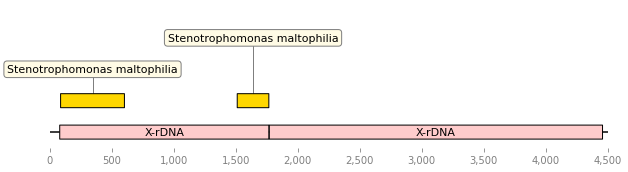

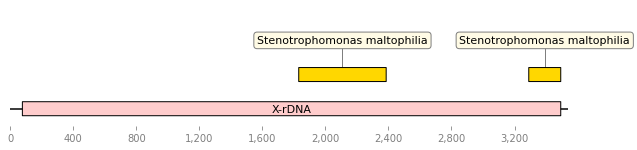

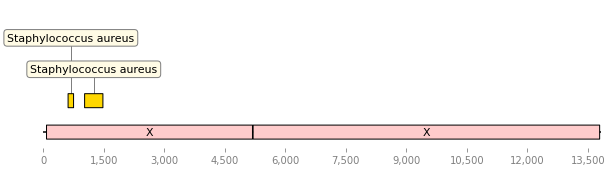

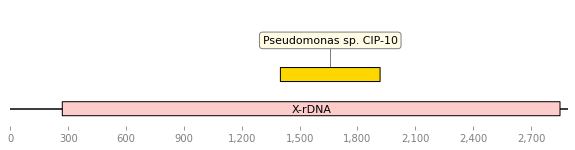

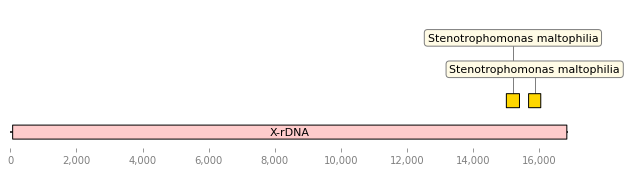

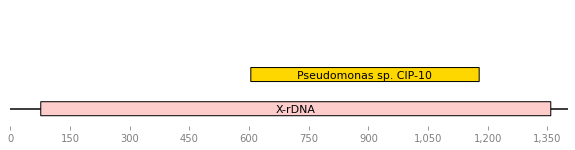

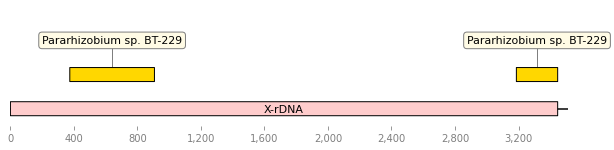

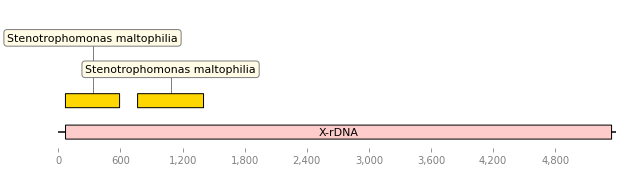

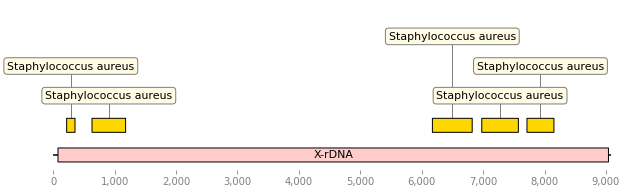

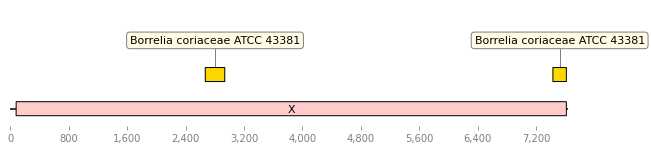

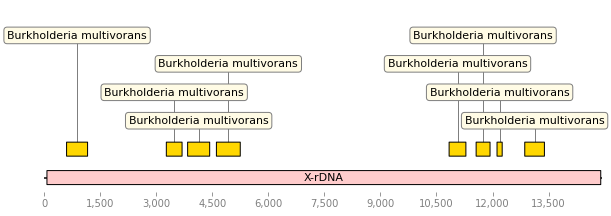

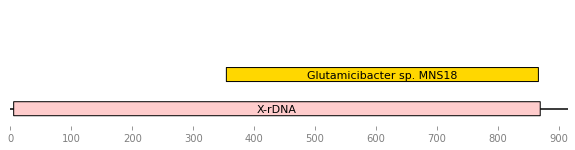

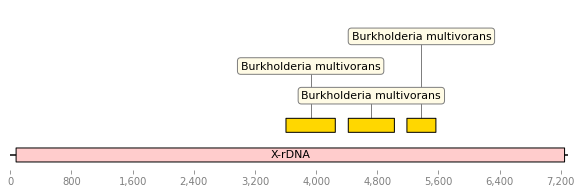

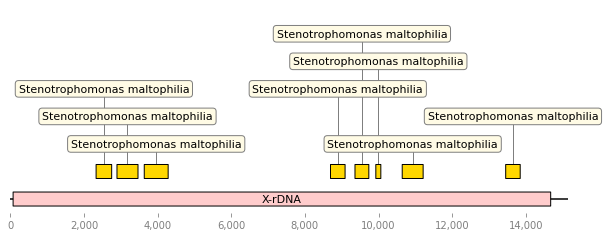

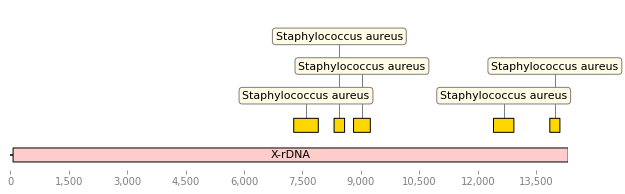

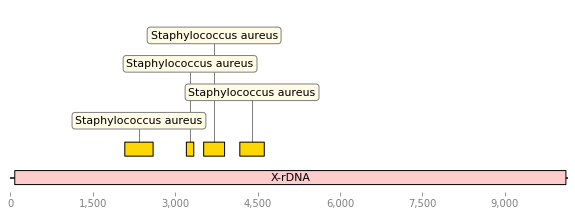

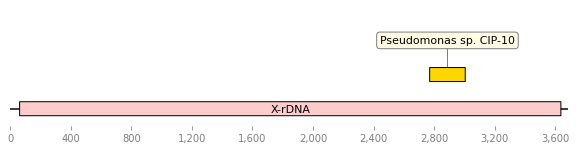

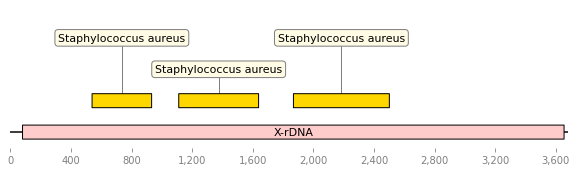

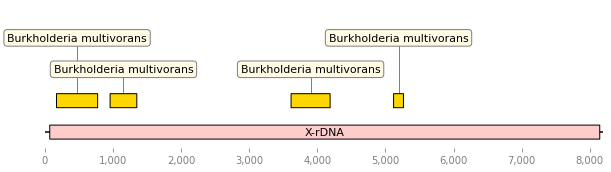

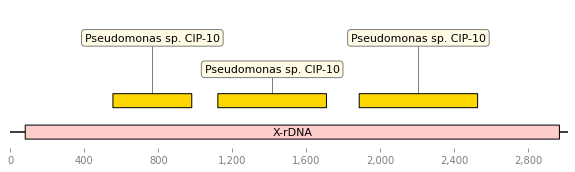

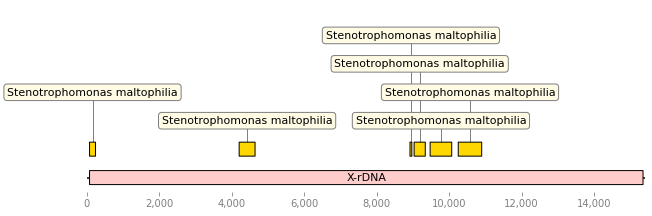

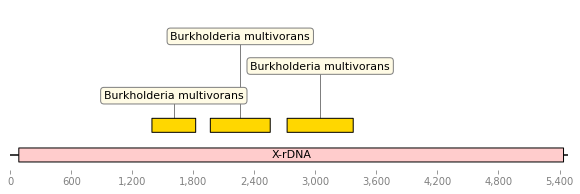

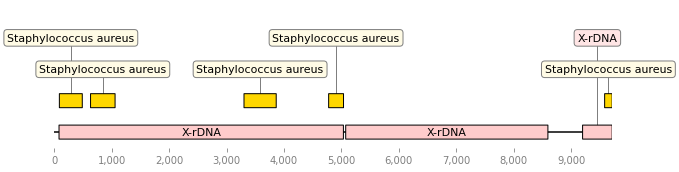

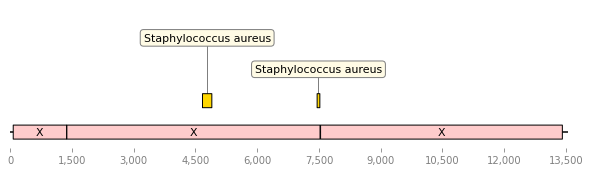

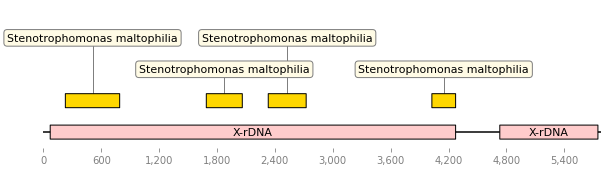

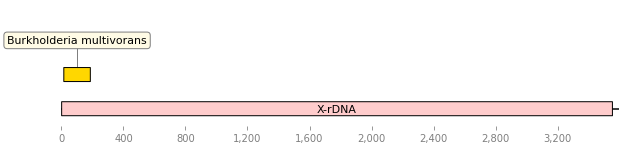

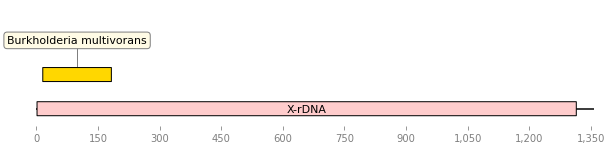

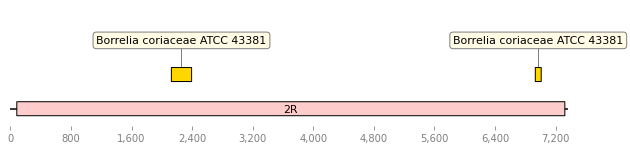

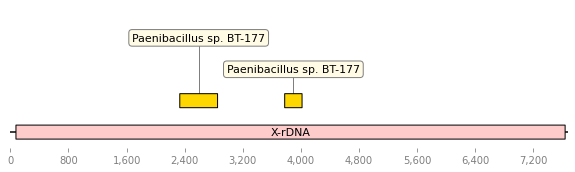

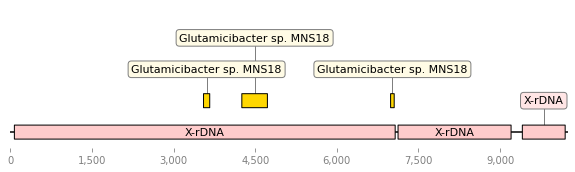

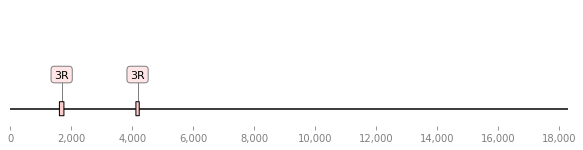

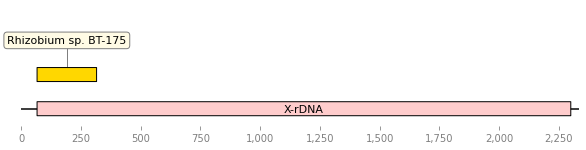

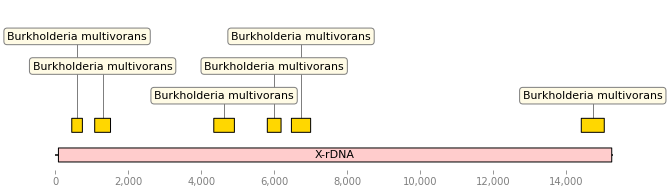

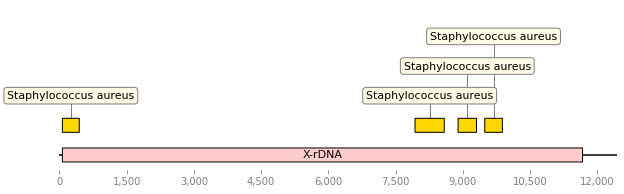

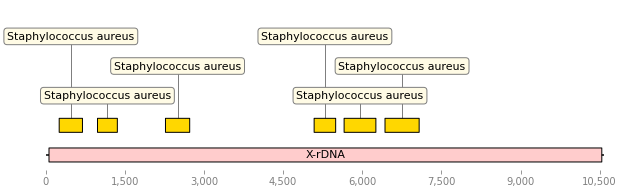

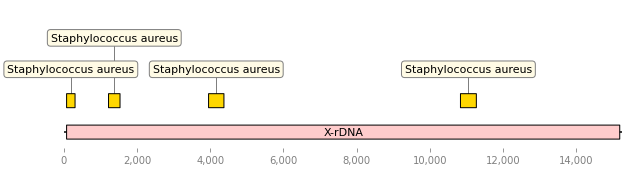

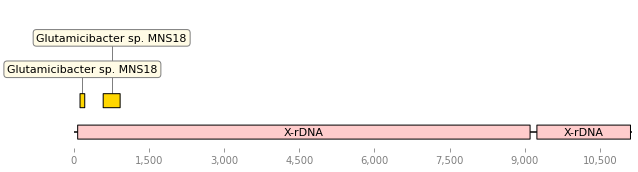

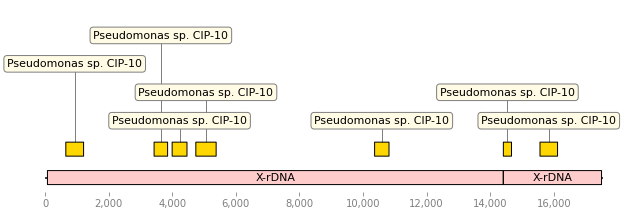

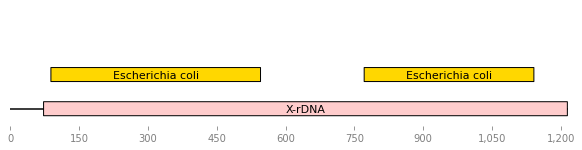

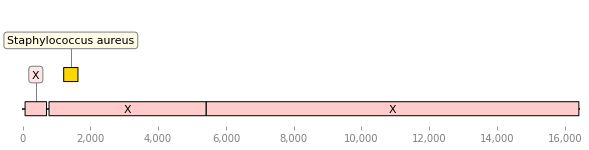

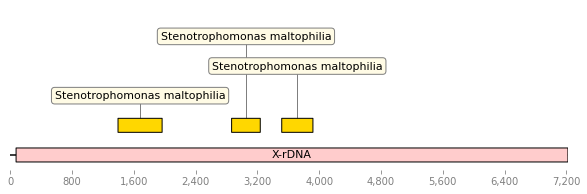

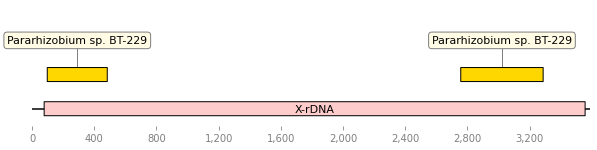

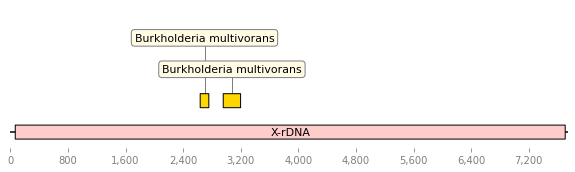

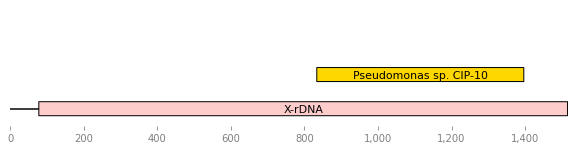

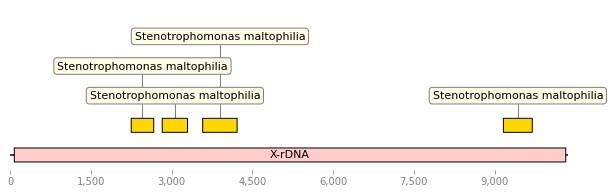

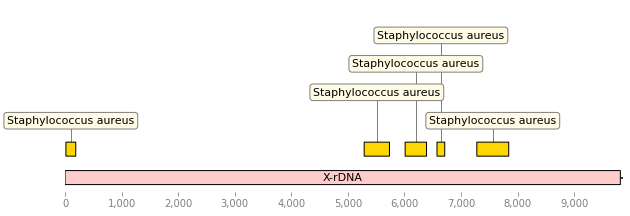

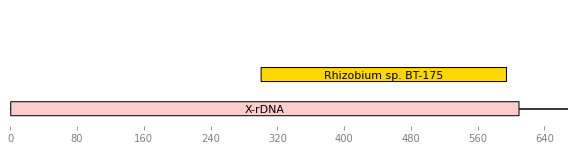

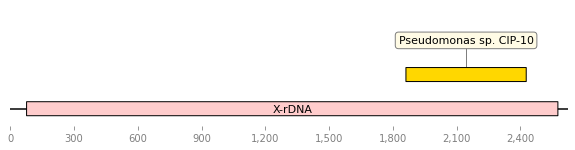

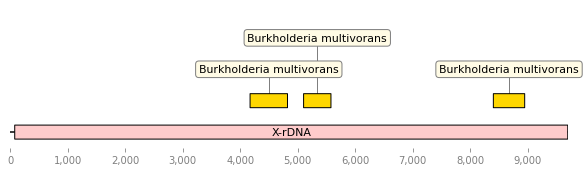

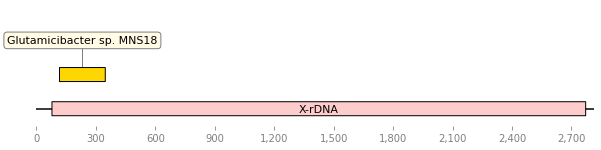

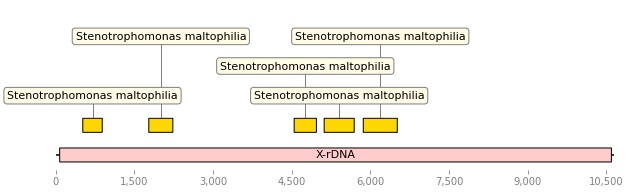

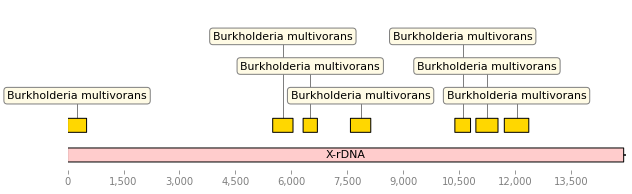

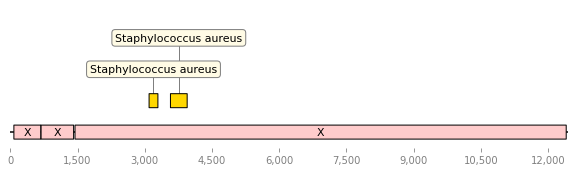

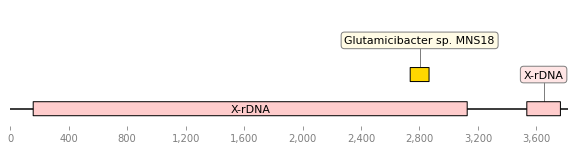

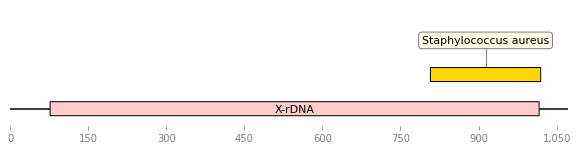

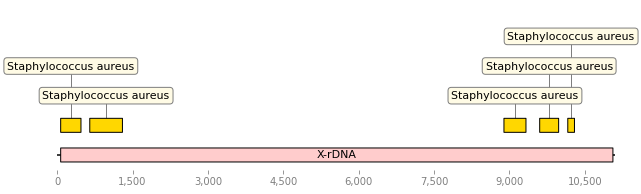

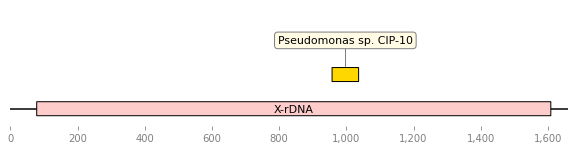

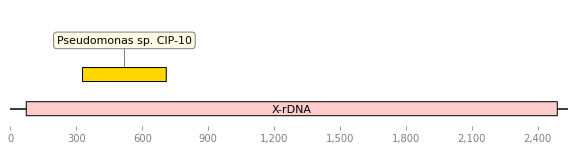

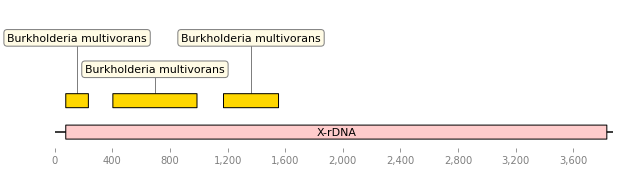

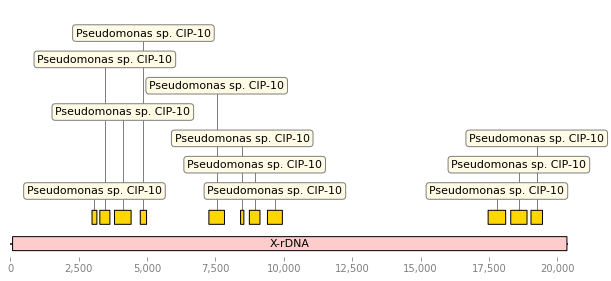

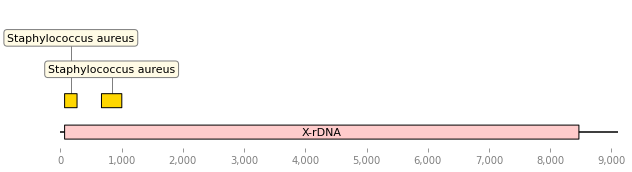

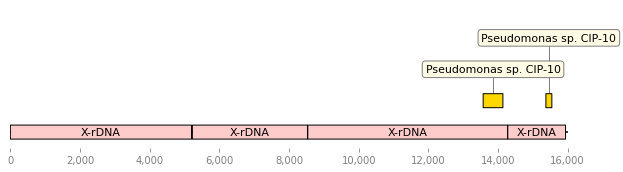

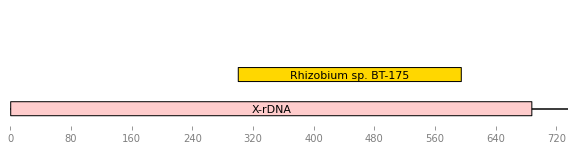

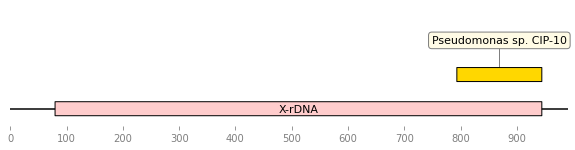

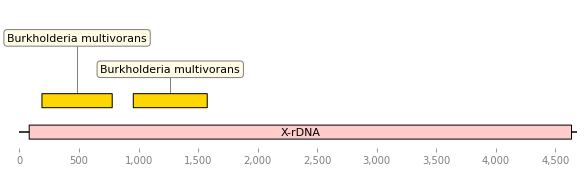

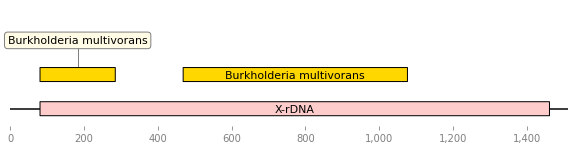

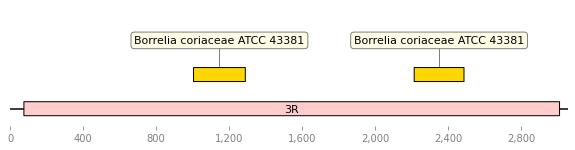

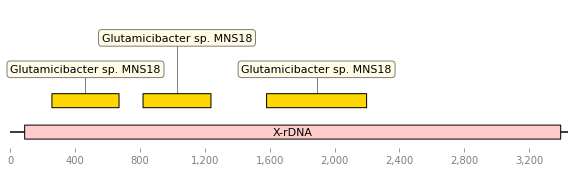

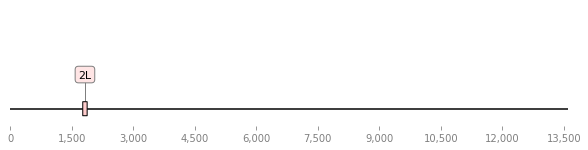

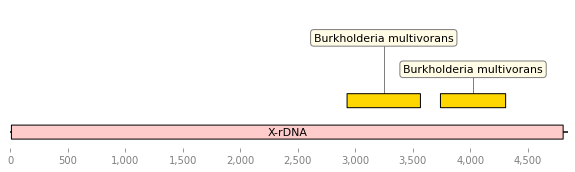

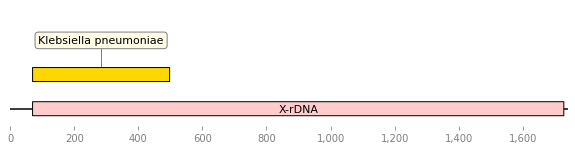

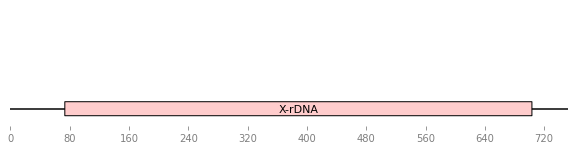

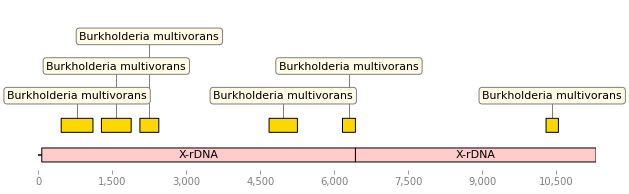

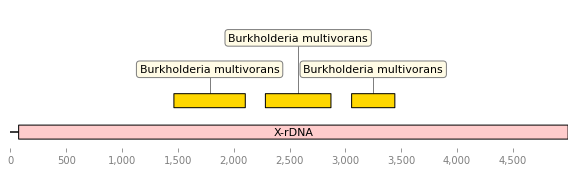

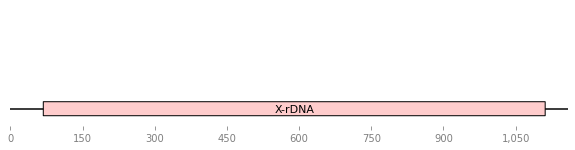

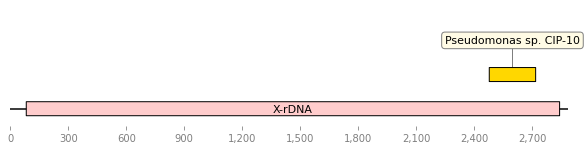

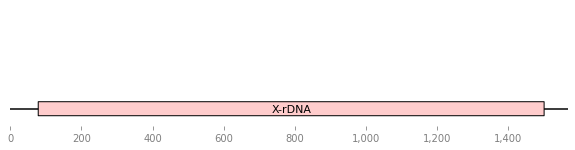

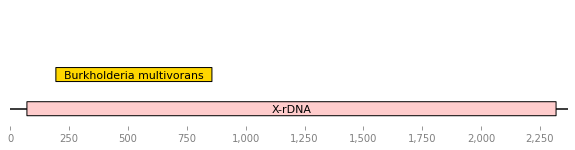

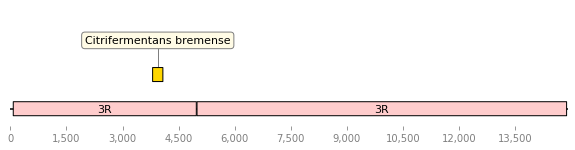

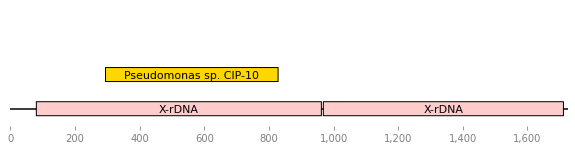

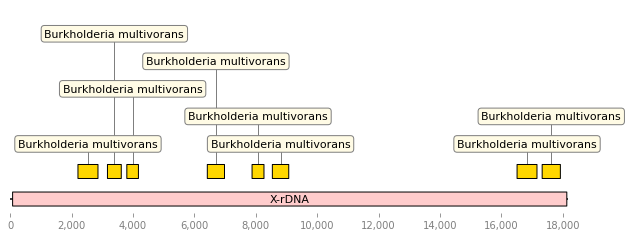

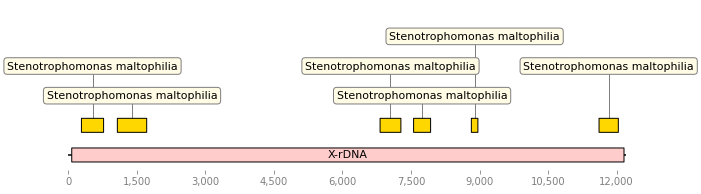

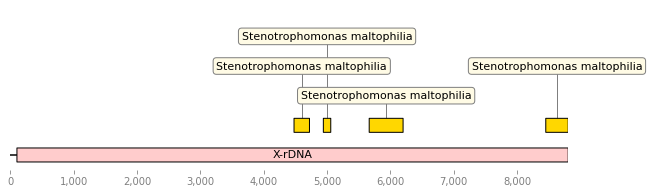

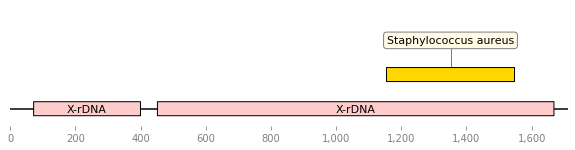

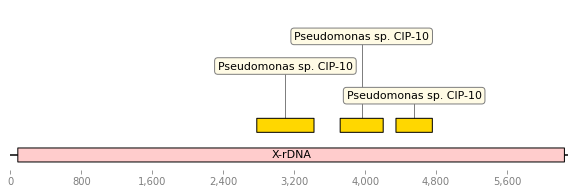

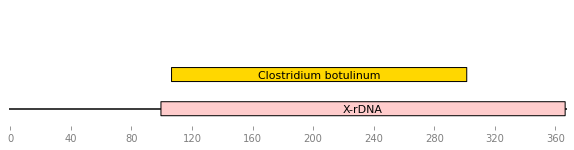

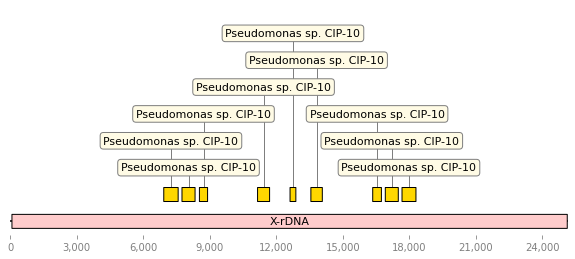

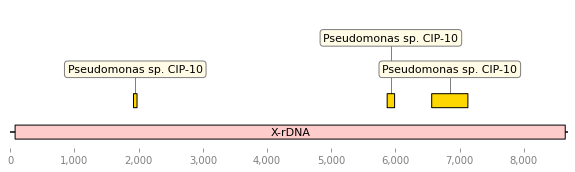

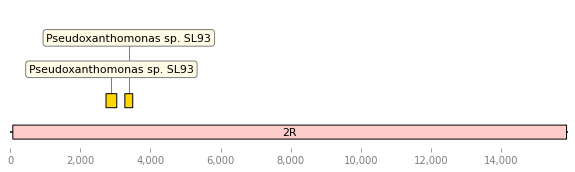

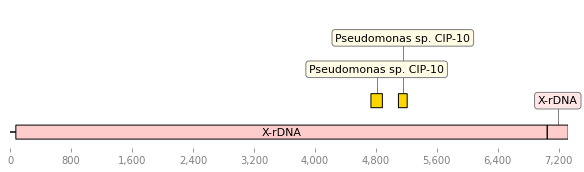

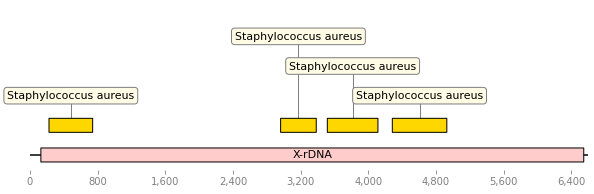

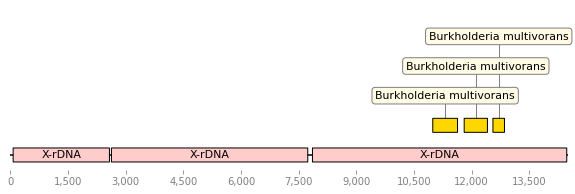

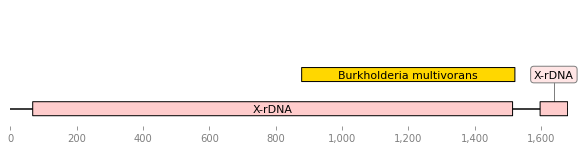

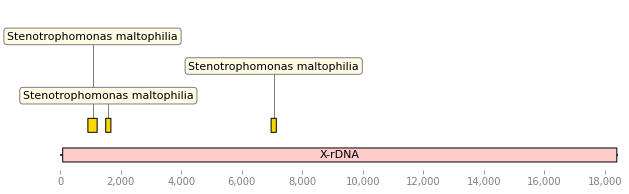

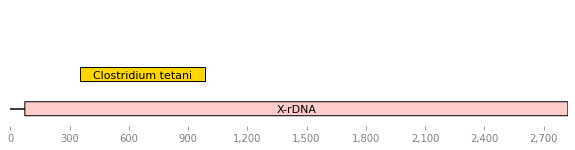

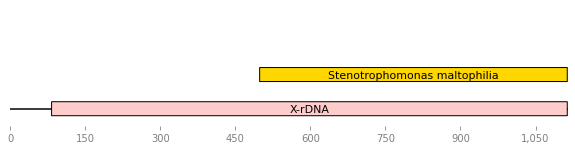

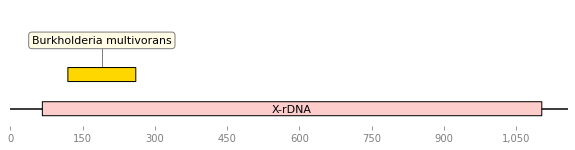

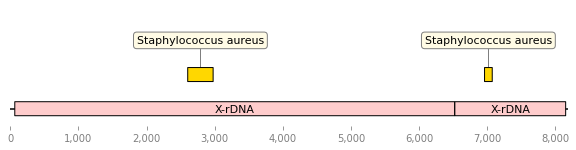

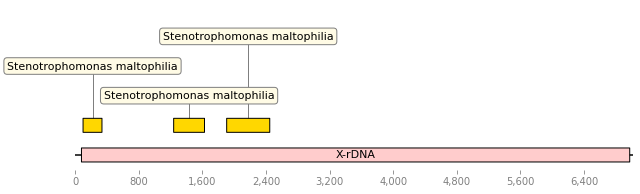

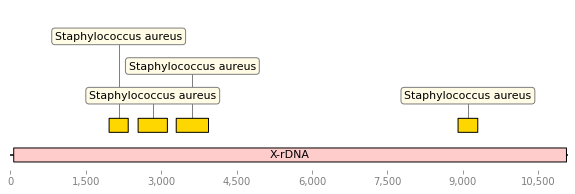

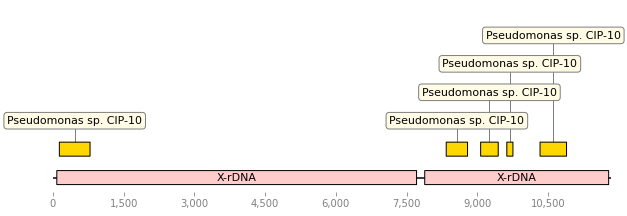

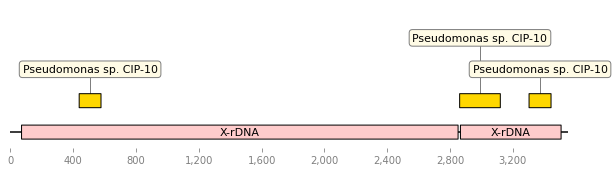

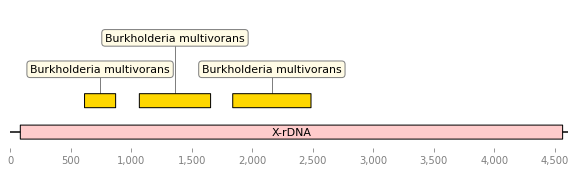

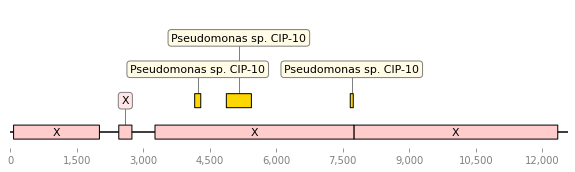

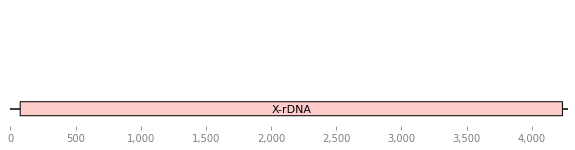

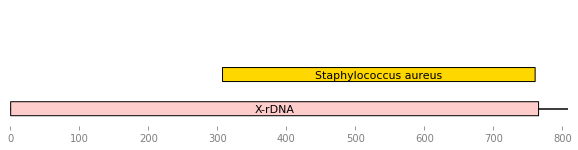

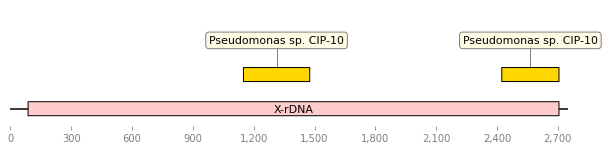

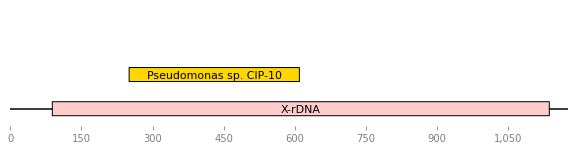

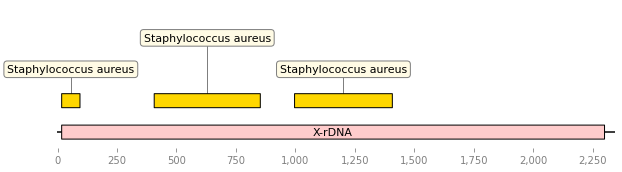

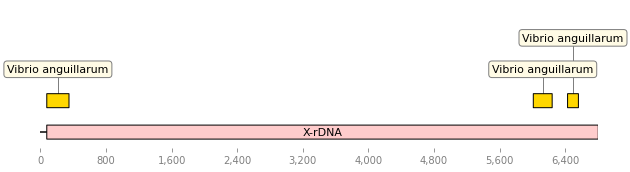

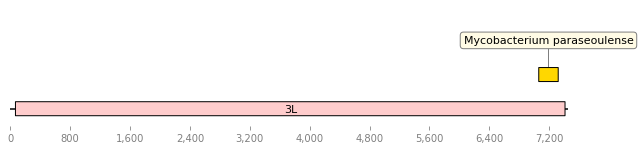

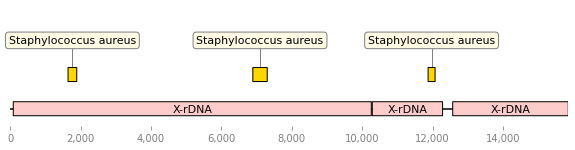

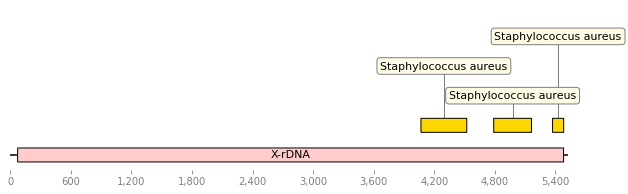

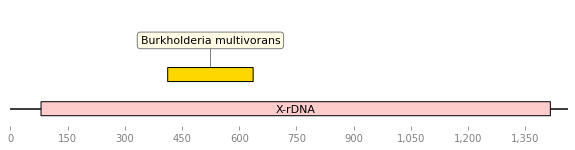

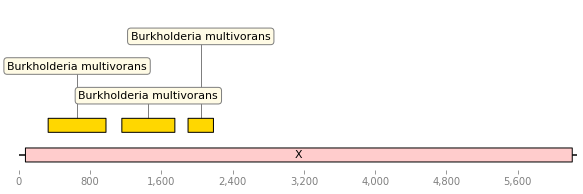

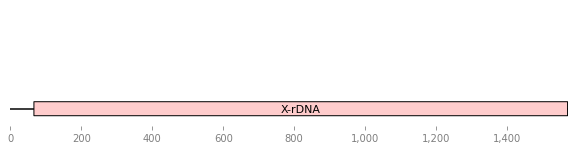

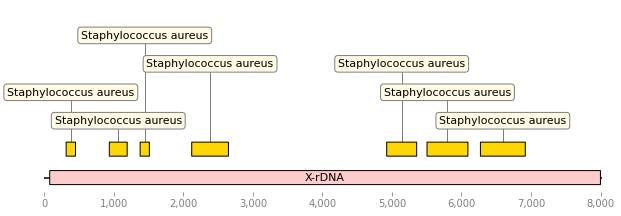

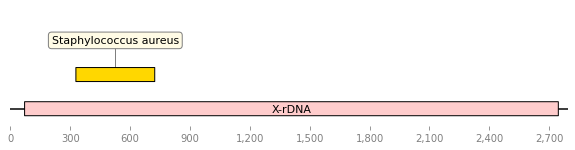

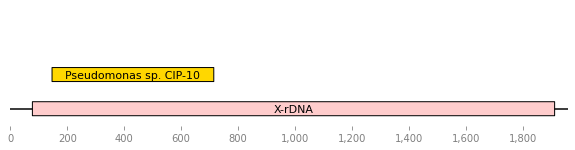

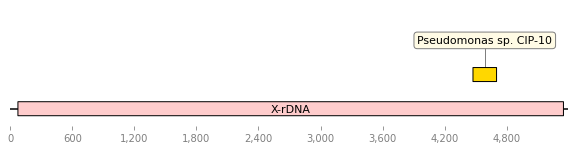

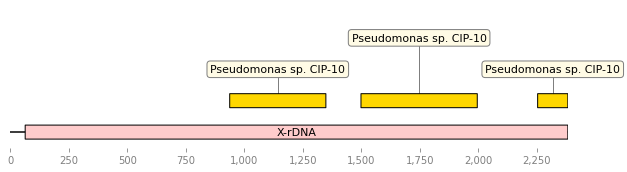

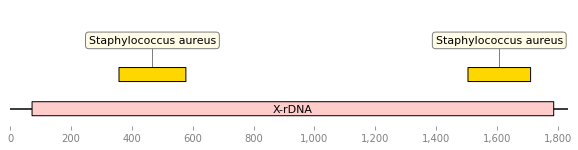

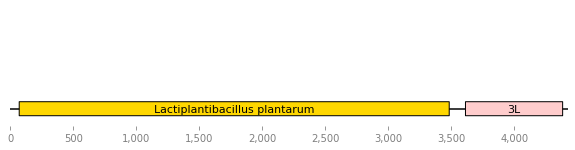

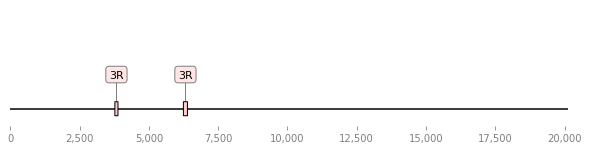

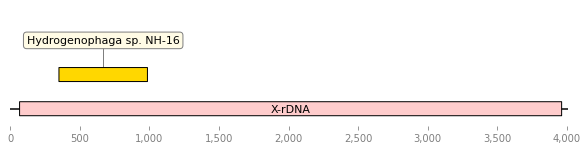

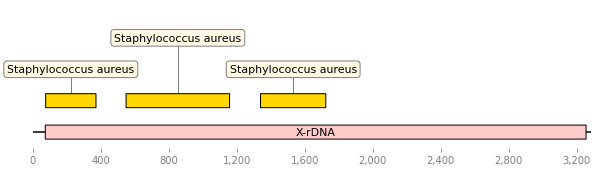

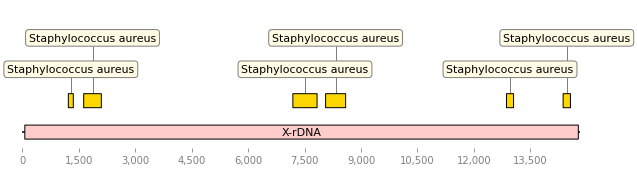

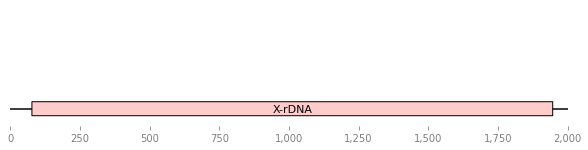

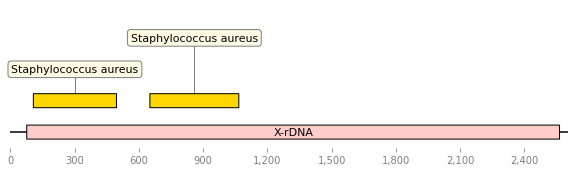

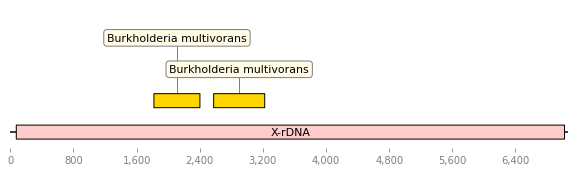

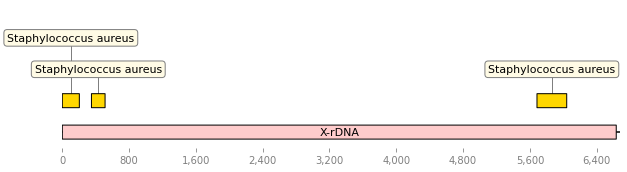

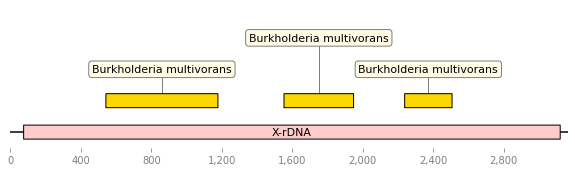

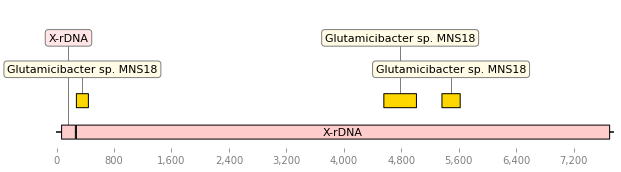

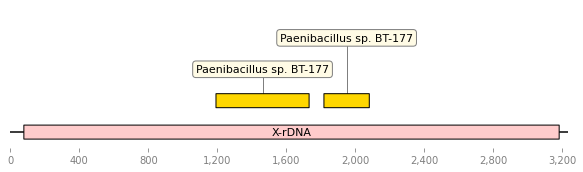

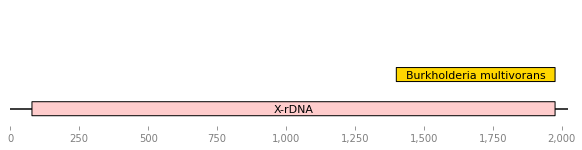

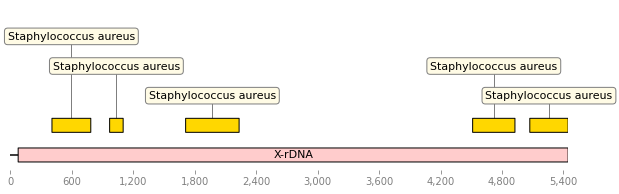

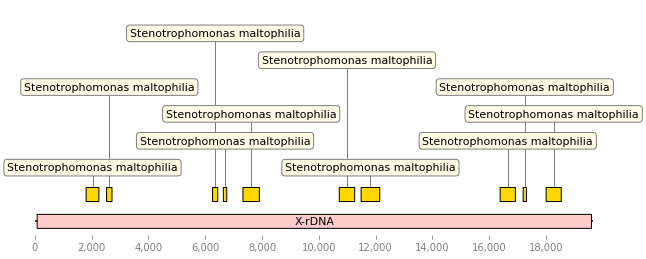

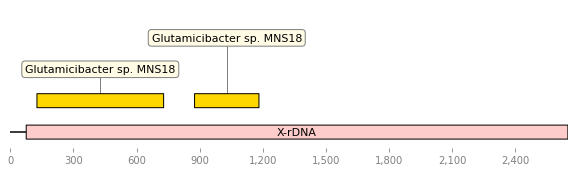

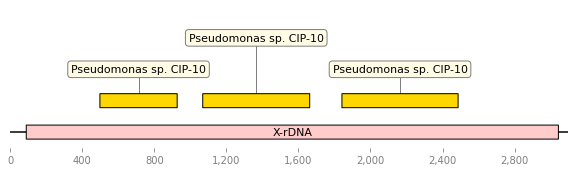

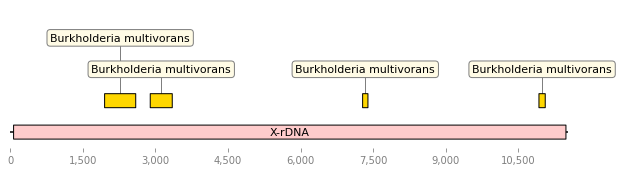

In [8]:
#print(list_b)

#globals()['0dc1a231-a41d-4176-bf5c-f9df79503521']


#seperate_list(globals()['65c7e1e4-9147-4f23-96f4-fd1d52035aa4']['bac_range'])








from dna_features_viewer import GraphicFeature, GraphicRecord
for ttt in list_b:
    readid=ttt
    bac_min_max_list=seperate_list(globals()[readid]['bac_range'])
    fly_min_max_list=seperate_list(globals()[readid]['fly_range'])
    total_length=globals()[readid]['qlength']
    features=[]
    if len(seperate_list(globals()[readid]['fly_range']))==0 or seperate_list(globals()[readid]['bac_range'])==0:
        continue
    for i in bac_min_max_list:
        features.append(GraphicFeature(start=i[0], end=i[1], strand=0, color="#ffd700", label=globals()[ttt]['bacteria_name']))

    for i in fly_min_max_list:
        features.append(GraphicFeature(start=i[0], end=i[1], strand=0, color="#ffcccc", label=globals()[ttt]['fly_chromosome']))

    print(ttt)
    record = GraphicRecord(sequence_length=total_length, features=features)
    record.plot(figure_width=10)

In [21]:
last_dict_fasta={}
for i in list_b:
    n=0
    if len(globals()[i]['seq_base'])==0:
        continue
    for kkk in globals()[i]['seq_base']:
        n+=1
        last_dict_fasta[f'{i}_{n}']=kkk
    

In [22]:
# for i,l in last_dict_fasta.items():
#     print(i.strip(),"\n",l.strip())
with open("/home/junwoojo/last_barcode19_integ_read.txt",'w') as file:
    for i,l in last_dict_fasta.items():
        file.writelines([f'>{i.strip()}',"\n",l.strip(),"\n"])

In [27]:

############barcode20###########################################
# list_in=['65c7e1e4-9147-4f23-96f4-fd1d52035aa4',
# '861f390a-cbf4-5aa7-a90f-9b9c96f9adb1',
# 'c443ba12-3d71-42ce-948c-9a967b09332e',
# '13b87e91-0ef1-4958-9110-f33301a875a4',
# 'aef58d91-0440-4508-af95-a42e1596ccd6',
# 'e63ef0e3-a727-4f0a-8d89-e7be7b4d39ee',
# 'd5b29c82-61de-4409-a4ed-dbb075c75b36',
# '4dbe80f5-ad1b-4d32-8c4a-e8cef4242e6a']


list_in=['80872459-9bfd-5e58-8758-2ca1c9a24370',
'6d85c0e4-79db-478f-93f2-f428a1e073b0',
'82c7ef88-d8a7-53a1-8c44-7ed45b3f2abe']


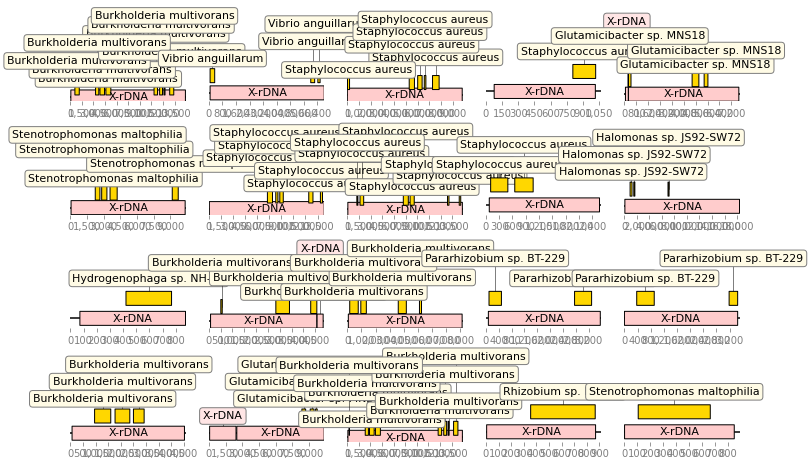

In [25]:
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt
list_record=[]
import pandas
for ttt in list(list_b)[0:20]:
    readid=ttt
    bac_min_max_list=seperate_list(globals()[readid]['bac_range'])
    fly_min_max_list=seperate_list(globals()[readid]['fly_range'])
    total_length=globals()[readid]['qlength']
    features=[]
    if len(seperate_list(globals()[readid]['fly_range']))==0 or seperate_list(globals()[readid]['bac_range'])==0:
        continue
    for i in bac_min_max_list:
        features.append(GraphicFeature(start=i[0], end=i[1], strand=0, color="#ffd700", label=globals()[ttt]['bacteria_name']))

    for i in fly_min_max_list:
        features.append(GraphicFeature(start=i[0], end=i[1], strand=0, color="#ffcccc", label=globals()[ttt]['fly_chromosome']))
    globals()[f'record_{ttt}'] = GraphicRecord(sequence_length=total_length, features=features)
    list_record.append(f'record_{ttt}')



fig, list_ax = plt.subplots(
    4, 5,figsize=(12, 8), sharex=False
)
ax_list=list_ax.ravel()

n=-1
for i in list_record:
    n+=1
    globals()[i].plot(figure_width=0.1,ax=ax_list[n])


In [ ]:
from dna_features_viewer import GraphicFeature, GraphicRecord
features=[
    GraphicFeature(start=0, end=2209, strand=0, color="#ffd700",
                   label="Fly carboxypeptidase B mRNA"),
    GraphicFeature(start=2464, end=3000, strand=0, color="#ffd700",
                   label="Fly centrosomal protein"),
    GraphicFeature(start=3289, end=5995, strand=0, color="#ffcccc",
                   label="Acetobacter persici strain TMW2"),
    GraphicFeature(start=9056, end=9330, strand=0, color="#ffd700",
                   label="Fly carboxypeptidase B   mRNA"),
]
record = GraphicRecord(sequence_length=10500, features=features)
record.plot(figure_width=5)


In [ ]:
from dna_features_viewer import GraphicFeature, GraphicRecord
features=[
    GraphicFeature(start=0, end=300, strand=0, color="#ffcccc",
                   label="Fly"),
    GraphicFeature(start=300, end=600, strand=0, color="#ffd700",
                   label="Bacteria"),
    GraphicFeature(start=600, end=900, strand=0, color="#ffcccc",
                   label="Fly"),
]
record = GraphicRecord(sequence_length=900, features=features)
record.plot(figure_width=5)
